**Attribution:**  
* Based "[Seaborn tutorial: Plotting Functions](https://seaborn.pydata.org/tutorial.html) by **Michael Waskom** under [BSD 3-clause](https://opensource.org/licenses/BSD-3-Clause) license.


**NOTE:** Some changes have been made.


<a name="top"></a>Exploratory Data Analysis
===

<a name="top"></a>Outline
---

* [Basic plotting with Matplotlib](#matplotlib)
  * [Numerical Variables](#numerical)
  * [Object oriented plotting](#objectoriented)
  * [The basic plot](#basic)
  * [Scatterplots](#scatterplot)
  * [Histograms](#histogram)
  * [Heatmaps](#heatmap)
* [Exercise 01: Matplotlib](#exercise01)
* [Sofisticated plotting with Seaborn](#seaborn)
  * [Jointplot](#jointplot)
  * [Timeseries plot](#tsplot)
  * [Categorical variables](#categorical)
  * [Categorical scatterplots](#categorical scatterplot)
  * [Distributions of observations within categories](#distribution)
  * [Statistical estimation within categories](#estimation)
* [Exercise 02: Seaborn](#exercise02)
* [Interactive plotting with Bokeh](#bokeh)
  * [Basic plotting interface](#bokeh intro)
  * [Handling big data](#big data)
  * [Interactive plotting](#interactive)
* [Exercise 03: Bokeh](#exercise03)

##### Introduction

<a name="seaborn"></a>Sofisticated plotting with Seaborn
===

Seaborn is a visualization library based on matplotlib. Its main features are
* very pleasing and clean default aesthetics
* high level interface for draving of statistical graphics
* extensive collection of plotting functions  
* works seamlessly with pandas dataframes
* as a nice side effect it also offers some simple datasets for testing

By simply importing seaborn, matplotlib automatically changes its default settings (fontsize, background canvas color, not frames) to look very clean. 

Accessing matplotlib via the seaborn API is a good choice for sofisticated graphics like violon plots or joint plots. If you are looking for tight control over every detail in a plot, you should use the matplotlib API.

In [1]:
import seaborn as sns

<a name="jointplot"></a>Jointplot
---

* The **jointplot()** function offers functionality to plot a scatterplot (bivariate graph) as well as histograms (univariate graph) over both axis.  
* To use seaborn together with a pandas dataframe, we provide the function with the dataframe (in this case ```tips```) along with the labels of the columns we want to use (in this case ```total_bill``` and ```tip```)
* We could also use NumPy arrays for the x and y arguments

In [2]:
tips = sns.load_dataset('tips')

In [4]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

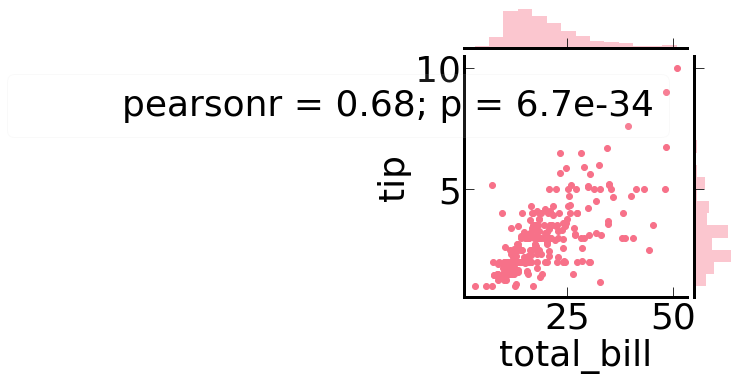

In [5]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="scatter")

[top](#top)

<a name="tsplot"></a>Timeseries plot
---

Timeseries plots are intended to visualize data where 
* different _sampling units_ belonging to the same _observational unit_ were measured
* at different points in time
* and therefore allow a measure for the uncertainty of the observation  

We can use **tsplot()** with a pandas dataframe of a NumPy array. It is important, that the data conforms to the 'tidy' data format, therefore
* each _variable_ forms a column and contains _values_
* each _observation_ forms a row
* each type of _observational unit_ forms a table or has a different _label_.  

In the example below, the variables are
* the timepoint
* the sampling unit ```subject```
* the signal ```BOLD signal```
* the observational unit ```ROI``` (different labels)  

There are 20 observations per timepoint and ROI accross 10 timepoints

In [6]:
# Load the long-form example gammas dataset
gammas = sns.load_dataset("gammas")
gammas.head()

,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433
1,0.0,IPS,1,-0.414368
2,0.0,IPS,2,0.214695
3,0.0,IPS,3,0.814809
4,0.0,IPS,4,-0.894992


/home/dmanik/projects/mpi/pyd3t/.devenv34/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


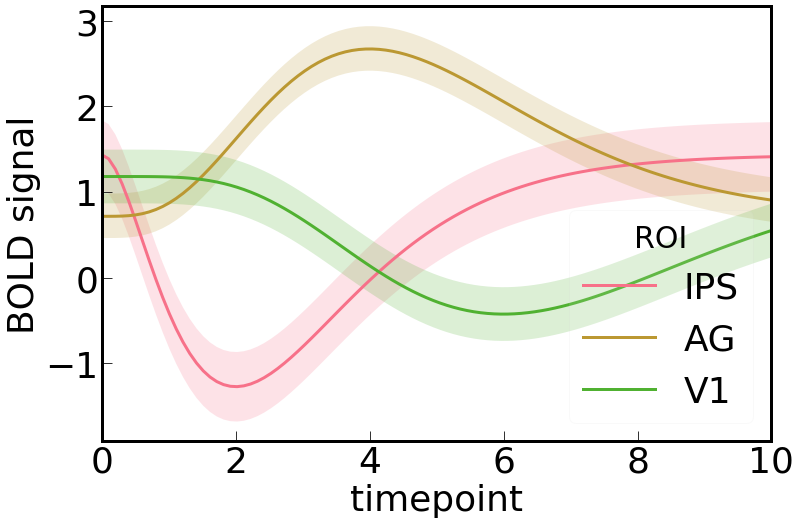

In [7]:
# Plot the response with standard error
sns.tsplot(data=gammas, time="timepoint", unit="subject",
           condition="ROI", value="BOLD signal");

[top](#top)

<a name="categorical"></a>Categorical variables
---

We previously learned how to use plots to visualize the relationship between two variables and how it changes across levels of additional categorical variables. In the example with the tips
* total bill and tip are _numerical variables_
* weekday and time of day are _categorical variables_  

However, what if one of the main variables we are interested in is categorical? Seaborn offers several options for plots of categorical variables
1. plots that show each observation at each level of categorical variable (**swarmplot**)
2. plots that show an abstract representation of each distribution of observations (**violinplot** and **boxplot**)
3. plots that apply a statistical estimation to show a measure of a central tendency & confidence interval (**barplot**)


[top](#top)

<a name="categorical scatterplot"></a>Categorical scatterplot
---

A simple way to show the the values of some quantitative variable across the levels of a categorical variable is to generalize a scatterplot to the case where one of the variables is categorical. This usually results in massive overlapping of the datapoints. Seaborn's **swarmplot** uses an algorithm to minimize the overlap between points.  
In the example below we see
* the _numerical_ variable ```total_bill``` 
* scattered over the _categorical_ variables of four weekdays
* and colored according to the sex of the waiter/waitress

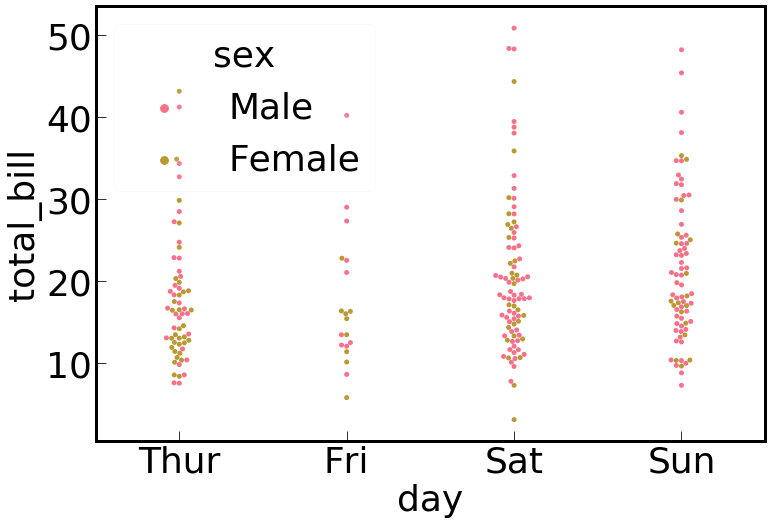

In [8]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

[top](#top)

<a name="distribution"></a>Distributions of observations within categories
---

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels.

##### Boxplot / Whisker plot

Boxplots or box-whisker-plots display groups of numerical data through their quartiles (four groups comprising of a quarter of the data each):
* the bottom and top of the box show the first and third quartiles
* the band inside the box shows the second quartile (median)
* the whiskers exten to the lowest and highest value still within 1.5 IQR (https://en.wikipedia.org/wiki/Interquartile_range)
* observations that fall outside this range are displayed as independent points (outliers)

![boxplot](https://www.qualitydigest.com/april05/Images/Features/SPC_F1.jpg)

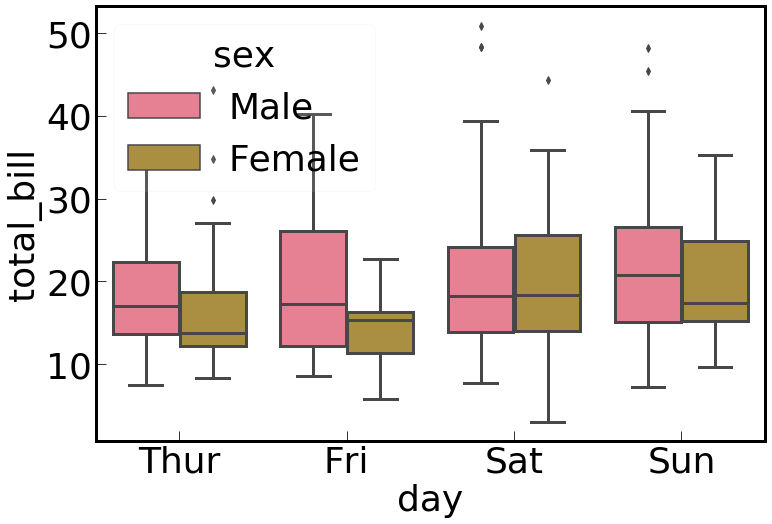

In [9]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips);

##### Violinplot

A different approach to showing numerical data belonging to several categories while keeping an estimate of its distribution is the violinplot. It combines the idea of the boxplot with the _kernel density estimation_ (KDE).  
KDE computes a 'smooth' probability density without the use of a prescribed distribution function and fit parameters. It does so by 
* replacing each observation with a _kernel_ curve (default = gaussian)
* summing up all kernel curves
* normalizing the resulting curve to 1

If we are comparing two populations (like female & male from the 'tips' dataset), we can 'split' the violins to show one KDE on each side of the violin respectively:

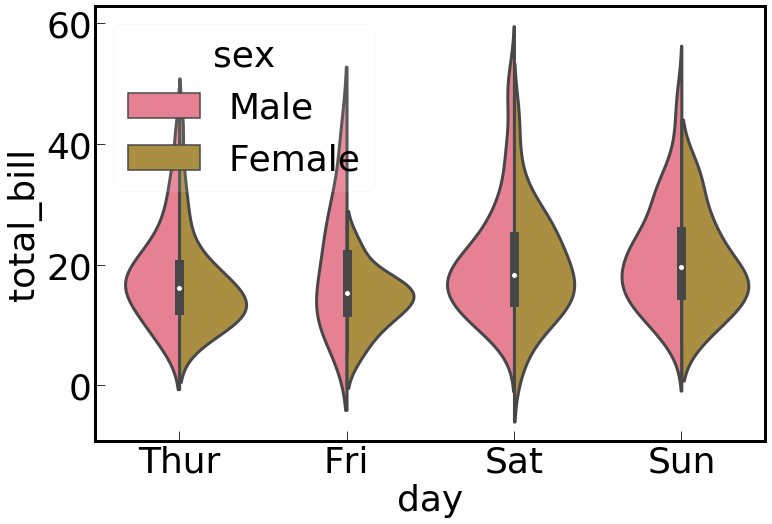

In [10]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, \
               split=True);

[top](#top)

<a name="estimation"></a>Statistical estimation within categories
---

##### Barplot

Often, rather than showing the distribution within each category, we might want to show the central tendency of the values. **barplot** accomplishes that by showing 
* an arbitrary estimate (default is the mean)
* a confidence interval around the estimate using bootstrapping when there are multiple observations in each category  

In the example below, the catgorical variables are
* the sexes ```male``` and ```female``` 
* as well as the class ```first```, ```second``` and ```third```  

The numerical data is the percentage in each category that survived the titanic, the confindence interval is shown as black errorbar. 

In [11]:
# dataset of survivors of the titanica
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


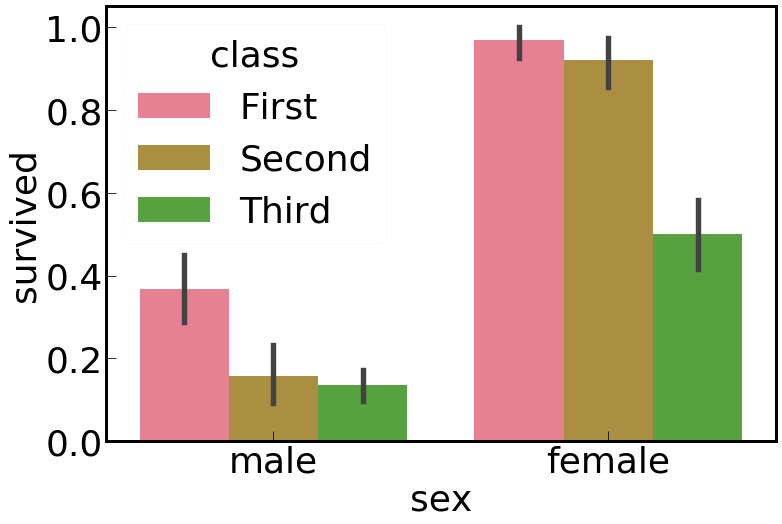

In [12]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

##### Countplot

Similar to a histogram we can also show the data as a **countplot** that is, in essence, a histogram over a categorical rather than a numerical variable.  
With the same titanic data we can show the number of survivors over the deck:

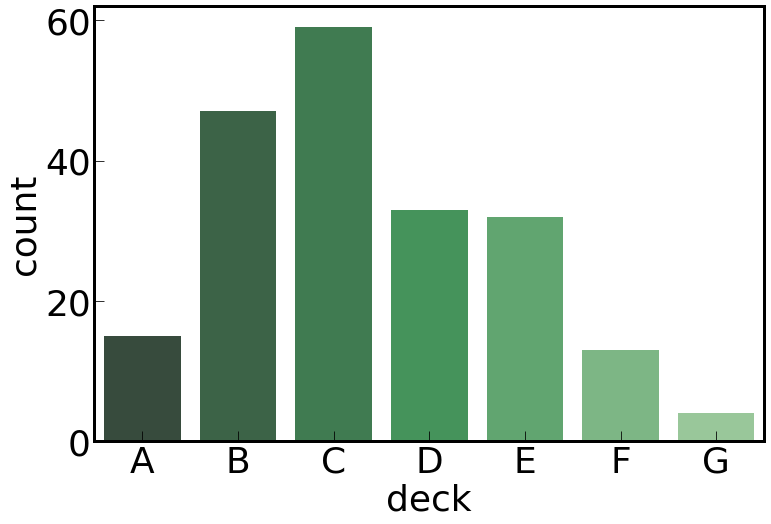

In [13]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

[top](#top)

<a name="exercise02"></a>Exercise 02: Seaborn
===

1. **Categorical Data** 
  1. Load the timeseries 'BMI_male' and 'BMI_female'  into pandas dataframes. The data contains information about the mean BMI for women and men in 200 countries over a time period from 1980 to 2008.
  2. Tidy up the datasets so 'Time' is a variable (**HINT**: ```pandas.melt()```) 
  3. Create a timeseries plot with the time development of the female BMI  averaging over all countries of a continent.
  4. Show the BMI for men for the different continents at the year 1990 in a swarmplot.
  5. Merge the two datasets into one, introducing the new label 'Sex' to describe the entries from the different datasets.
  6. Plot the BMI for the year 2000 in a whisker plot showing men and women in a different color.
  7. Show the BMIs in a violinplot: 
    * for the year 2000 split between men and women
    * the combined BMIs for men and women split between the years 1980 and 2000.
  8. Show BMIs for the years 1980, 1990 and 2000 in a barplot: 
    * split for the continents 
    * split for the sexes

[top](#top)